In [63]:
#import library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [4]:
# import csv files
df= pd.read_csv(r"C:\Users\HP\Downloads\S&P+500+Stock+Prices+2014-2017.csv\S&P 500 Stock Prices 2014-2017.csv")

In [48]:
#preview datatsets df
df.head(100)

,symbol,date,open,high,low,close,volume,day
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,Thursday
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,Thursday
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,Thursday
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,Thursday
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,Thursday


In [21]:
# Display the information of each columns and total rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497472 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [8]:
# quick overview of numerical tables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,497461.0,8.635227e+01,1.014712e+02,1.62,4.169000e+01,6.497000e+01,98.41,2.044000e+03
high,497464.0,8.713256e+01,1.023121e+02,1.69,4.209000e+01,6.556000e+01,99.23,2.067990e+03
low,497464.0,8.555247e+01,1.005710e+02,1.50,4.128000e+01,6.435370e+01,97.58,2.035110e+03
close,497472.0,8.636908e+01,1.014724e+02,1.59,4.170375e+01,6.498000e+01,98.42,2.049000e+03
volume,497472.0,4.253611e+06,8.232139e+06,0.00,1.080166e+06,2.084896e+06,4271928.00,6.182376e+08


In [10]:
#quick overview of non-numerical tables
df.describe(include='O').T

,count,unique,top,freq
symbol,497472,505,KIM,1007
date,497472,1007,2017-12-12,505


In [15]:
#check for null values
df.isna().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [13]:
# number of rows and column
df.shape

(497472, 7)

In [16]:
#fill empty cells in each column with it mean()
df['open'].fillna(df['open'].mean(), inplace=True)
df['high'].fillna(df['high'].mean(), inplace=True)
df['low'].fillna(df['low'].mean(), inplace=True)

In [47]:
df['day']= df['date'].dt.day_name()

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>],
       [<AxesSubplot:title={'center':'volume'}>, <AxesSubplot:>]],
      dtype=object)

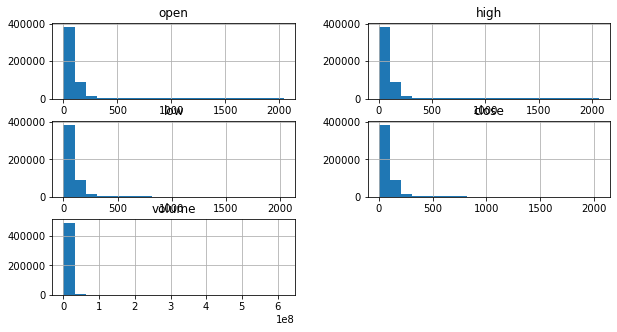

In [19]:
df.hist(figsize=(10,5), bins=20)

In [20]:
#convert date column to date time
df['date']= pd.to_datetime(df['date'])

## Questions

- Which date in the sample saw the largest overall trading volume? On that date, which two stocks were traded most?

- On which day of the week does volume tend to be highest? Lowest?

- On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?

- If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?

### 1. Which date in the sample saw the largest overall trading volume? On that date, which two stocks were traded most?

In [29]:
df.groupby('date')['volume'].sum().sort_values(ascending=False)

date
2015-08-24    4607945196
2016-06-24    4367393052
2015-12-18    4124454411
2016-01-20    4087629753
2016-11-10    4060601612
                 ...    
2014-12-26     894908944
2015-11-27     791154818
2014-12-24     750895627
2015-12-24     736263173
2017-11-24     728261080
Name: volume, Length: 1007, dtype: int64

In [34]:
highest_day = df[df['date']=='2015-08-24']

In [46]:
highest_day.groupby('symbol')['volume'].sum().sort_values(ascending=False).head(2)

symbol
BAC     214649482
AAPL    162206292
Name: volume, dtype: int64

In [45]:
highest_day.nlargest(2,'volume')

,symbol,date,open,high,low,close,volume
201266,BAC,2015-08-24,15.02,15.98,14.6,15.29,214649482
201209,AAPL,2015-08-24,94.87,108.80,92.0,103.12,162206292


### 2.On which day of the week does volume tend to be highest? Lowest?

In [49]:
df.groupby('day')['volume'].sum().sort_values(ascending=False)

day
Wednesday    441712704746
Friday       440535234884
Thursday     431160024905
Tuesday      428297652485
Monday       374346703519
Name: volume, dtype: int64

<AxesSubplot:title={'center':'Volume by Week Day'}, xlabel='Day Of The week', ylabel='Volume'>

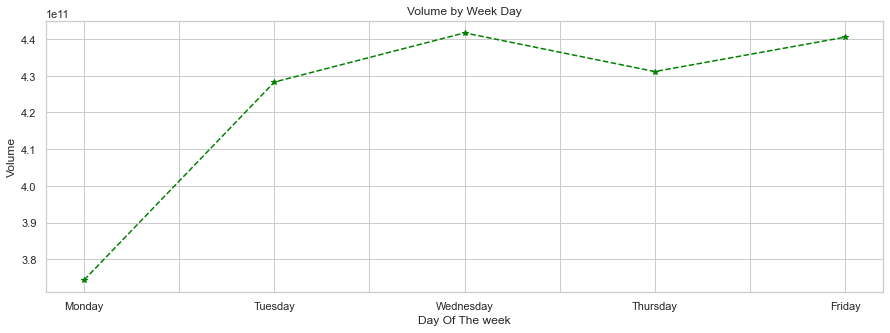

In [64]:
df.groupby('day')['volume'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday']).plot(kind='line', xlabel='Day Of The week', ylabel='Volume',title='Volume by Week Day',color='Green', marker='*', linestyle='--', figsize= (15,5))

### 3.On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?

In [68]:
amazon= df[df['symbol']=='AMZN']

In [71]:
amazon

,symbol,date,open,high,low,close,volume,day,diffrence
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,Thursday,5.34
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,Friday,6.49
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,Monday,8.58
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,Tuesday,4.18
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,Wednesday,6.96
...,...,...,...,...,...,...,...,...,...
494984,AMZN,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,Friday,6.79
495489,AMZN,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,Tuesday,17.77
495994,AMZN,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,Wednesday,11.68
496499,AMZN,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,Thursday,5.72


In [70]:
amazon['diffrence']= amazon['high'] -amazon['low']

<ipython-input-70-4c16a681764b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['diffrence']= amazon['high'] -amazon['low']


In [80]:
amazon.groupby('date')['diffrence'].sum().sort_values(ascending=False)

date
2017-06-09    85.99
2016-11-10    61.13
2017-10-27    55.03
2015-07-24    51.22
2017-11-29    49.61
              ...  
2015-03-24     2.97
2014-12-31     2.97
2014-11-26     2.90
2014-06-03     2.85
2014-08-19     2.80
Name: diffrence, Length: 1007, dtype: float64

In [78]:
amazon.nlargest(1,'diffrence')

,symbol,date,open,high,low,close,volume,day,diffrence
426023,AMZN,2017-06-09,1012.5,1012.99,927.0,978.31,7647692,Friday,85.99


In [81]:
amazon.nsmallest(1,'diffrence')

,symbol,date,open,high,low,close,volume,day,diffrence
76587,AMZN,2014-08-19,334.87,335.81,333.01,335.13,1714120,Tuesday,2.8


### 4. If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?

In [93]:
df_2014= df[df['date']=='2014-01-02']

In [101]:
df_2017= df[df['date']=='2017-12-29']

In [98]:
df_open= df_2014.iloc[:,[0,2]]

In [102]:
df_close=df_2017.iloc[:,[0,5]]

In [100]:
df_open

,symbol,open
0,AAL,25.0700
1,AAPL,79.3828
2,AAP,110.3600
3,ABBV,52.1200
4,ABC,70.1100
...,...,...
478,XYL,34.3900
479,YUM,75.3800
480,ZBH,92.6300
481,ZION,29.9000


In [103]:
df_close

,symbol,close
496967,AAL,52.03
496968,AAPL,169.23
496969,AAP,99.69
496970,ABBV,96.71
496971,ABC,91.82
...,...,...
497467,XYL,68.20
497468,YUM,81.61
497469,ZBH,120.67
497470,ZION,50.83


In [124]:
df_total= df_open.merge(df_close, on='symbol')
df_total

,symbol,open,close
0,AAL,25.0700,52.03
1,AAPL,79.3828,169.23
2,AAP,110.3600,99.69
3,ABBV,52.1200,96.71
4,ABC,70.1100,91.82
...,...,...,...
478,XYL,34.3900,68.20
479,YUM,75.3800,81.61
480,ZBH,92.6300,120.67
481,ZION,29.9000,50.83


In [115]:
diff= (df_total['close']-df_total['open'])*100.0
df_total['percentage']= diff/df_total['open']
df_total

,symbol,open,close,percentage
0,AAL,25.0700,52.03,107.538891
1,AAPL,79.3828,169.23,113.182201
2,AAP,110.3600,99.69,-9.668358
3,ABBV,52.1200,96.71,85.552571
4,ABC,70.1100,91.82,30.965625
...,...,...,...,...
478,XYL,34.3900,68.20,98.313463
479,YUM,75.3800,81.61,8.264792
480,ZBH,92.6300,120.67,30.270971
481,ZION,29.9000,50.83,70.000000


In [117]:
df_total.nlargest(5,'percentage')

,symbol,open,close,percentage
330,NVDA,15.9200,193.50,1115.452261
51,AVGO,52.8500,256.90,386.092715
146,EA,22.9000,105.06,358.777293
25,ALGN,57.0600,222.19,289.397126
318,NFLX,52.4014,191.96,266.326091


In [119]:
df_total.nsmallest(5,'percentage')

,symbol,open,close,percentage
90,CHK,27.07,3.96,-85.371260
385,RRC,83.13,17.06,-79.477926
131,DISCA,90.21,22.38,-75.191220
132,DISCK,83.22,21.17,-74.561404
283,MAT,47.57,15.38,-67.668699
